In [1]:
"""
Statistical Analysis Framework - Hypothesis-Driven Approach

This notebook follows the scientific method:
1. Research Question - What are we investigating?
2. Hypothesis - What do we expect to find?
3. Methodology - How will we test it?
4. Results - What did we observe?
5. Conclusion - Was our hypothesis supported?

We'll test various statistical concepts using real-world datasets.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind, f_oneway, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette('husl')

In [2]:
"""
Data Loading: Real-world datasets for statistical testing

1. Boston Housing: Regression analysis, correlation testing
2. Iris: Classification, ANOVA testing 
3. Tips: Chi-square testing, group comparisons
"""

# Boston Housing Dataset
boston_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(boston_url)
print("Boston Housing Dataset:")
print(boston.head())
print(f"Shape: {boston.shape}\n")

# Iris Dataset  
iris_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
iris = pd.read_csv(iris_url)
print("Iris Dataset:")
print(iris.head())
print(f"Shape: {iris.shape}\n")

# Tips Dataset
tips_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(tips_url)
print("Tips Dataset:")
print(tips.head())
print(f"Shape: {tips.shape}")

Boston Housing Dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Shape: (506, 14)

Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  

Correlations with House Price (medv):
medv       1.000000
lstat     -0.737663
rm         0.695360
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

Hypothesis Testing Results (vs zero correlation):
H1 - Rooms vs Price: r=0.695, p=0.0000
H2 - Crime vs Price: r=-0.388, p=0.0000
H3 - Distance vs Price: r=0.250, p=0.0000


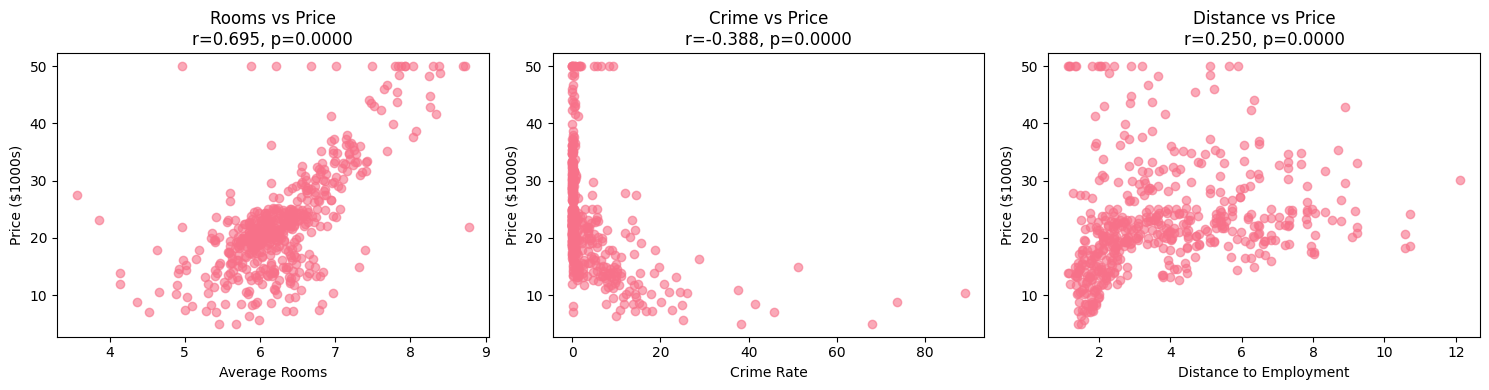


Conclusion:
H1 SUPPORTED: Rooms correlation 0.695, p=0.0000
H2 SUPPORTED: Crime correlation -0.388, p=0.0000
H3 REJECTED: Distance correlation 0.250, p=0.0000


In [4]:
"""
SECTION 1: Correlation Analysis

Research Question: Which factors most strongly predict house prices in Boston?

Hypotheses:
H1: Room count (rm) will positively correlate with price
H2: Crime rate (crim) will negatively correlate with price
H3: Distance to employment centers (dis) will negatively correlate with price

Expectations: r > 0 for rooms, r < 0 for crime, r < 0 for distance
"""

# Calculate correlations with price
correlations = boston.corr()['medv'].sort_values(key=abs, ascending=False)
print("Correlations with House Price (medv):")
print(correlations)

# Test specific hypotheses
rm_corr, rm_p = pearsonr(boston['rm'], boston['medv'])
crim_corr, crim_p = pearsonr(boston['crim'], boston['medv'])
dis_corr, dis_p = pearsonr(boston['dis'], boston['medv'])

print(f"\nHypothesis Testing Results (vs zero correlation):")
print(f"H1 - Rooms vs Price: r={rm_corr:.3f}, p={rm_p:.4f}")
print(f"H2 - Crime vs Price: r={crim_corr:.3f}, p={crim_p:.4f}")
print(f"H3 - Distance vs Price: r={dis_corr:.3f}, p={dis_p:.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(boston['rm'], boston['medv'], alpha=0.6)
axes[0].set_xlabel('Average Rooms')
axes[0].set_ylabel('Price ($1000s)')
axes[0].set_title(f'Rooms vs Price\nr={rm_corr:.3f}, p={rm_p:.4f}')

axes[1].scatter(boston['crim'], boston['medv'], alpha=0.6)
axes[1].set_xlabel('Crime Rate')
axes[1].set_ylabel('Price ($1000s)')
axes[1].set_title(f'Crime vs Price\nr={crim_corr:.3f}, p={crim_p:.4f}')

axes[2].scatter(boston['dis'], boston['medv'], alpha=0.6)
axes[2].set_xlabel('Distance to Employment')
axes[2].set_ylabel('Price ($1000s)')
axes[2].set_title(f'Distance vs Price\nr={dis_corr:.3f}, p={dis_p:.4f}')

plt.tight_layout()
plt.show()

print(f"\nConclusion:")
print(f"H1 {'SUPPORTED' if (rm_corr > 0 and rm_p < 0.05) else 'REJECTED'}: Rooms correlation {rm_corr:.3f}, p={rm_p:.4f}")
print(f"H2 {'SUPPORTED' if (crim_corr < 0 and crim_p < 0.05) else 'REJECTED'}: Crime correlation {crim_corr:.3f}, p={crim_p:.4f}")
print(f"H3 {'SUPPORTED' if (dis_corr < 0 and dis_p < 0.05) else 'REJECTED'}: Distance correlation {dis_corr:.3f}, p={dis_p:.4f}")


Group sizes: High rooms (>6.2): 253, Low rooms (≤6.2): 253
Mean prices: High rooms: $26.9k, Low rooms: $18.2k

Assumption Testing:
Normality - High rooms: p=0.0000
Normality - Low rooms: p=0.0000
Equal variances (Levene): p=0.0000

T-test Results:
t-statistic: 12.046
p-value: 0.000000
Cohen's d: 1.071


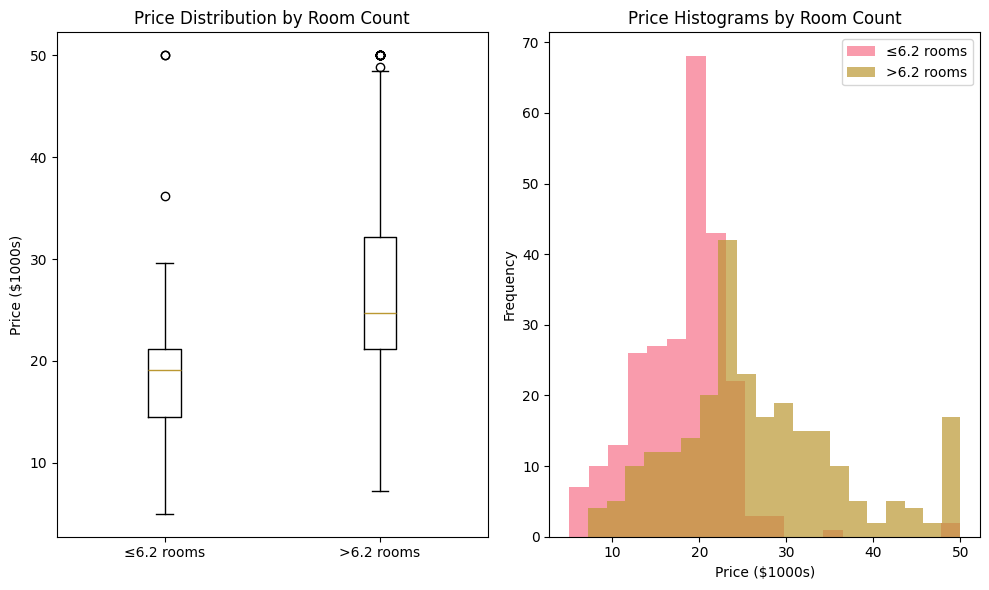


Conclusion:
H1 SUPPORTED: p=0.000000 < 0.05
Effect size: Large (d=1.071)
Expected large effect: YES


In [17]:
"""
SECTION 2: Independent T-Test Analysis

Research Question: Do houses with more rooms command significantly higher prices?

Hypothesis:
H0: No difference in price between high-room and low-room houses
H1: High-room houses (>6 rooms) cost significantly more than low-room houses (≤6 rooms)

Expectations: Significant difference (p < 0.05), large effect size (Cohen's d > 0.8)
"""

# Create groups based on room count
median_rooms = boston['rm'].median()
high_rooms = boston[boston['rm'] > median_rooms]['medv']
low_rooms = boston[boston['rm'] <= median_rooms]['medv']

print(f"Group sizes: High rooms (>{median_rooms:.1f}): {len(high_rooms)}, Low rooms (≤{median_rooms:.1f}): {len(low_rooms)}")
print(f"Mean prices: High rooms: ${high_rooms.mean():.1f}k, Low rooms: ${low_rooms.mean():.1f}k")

# Assumption testing
_, norm_p_high = stats.shapiro(high_rooms)
_, norm_p_low = stats.shapiro(low_rooms)
_, levene_p = stats.levene(high_rooms, low_rooms)

print(f"\nAssumption Testing:")
print(f"Normality - High rooms: p={norm_p_high:.4f}")
print(f"Normality - Low rooms: p={norm_p_low:.4f}")
print(f"Equal variances (Levene): p={levene_p:.4f}")

# Perform t-test
t_stat, p_value = ttest_ind(high_rooms, low_rooms, equal_var=(levene_p > 0.05))

# Calculate effect size (Cohen's d)
pooled_std = np.sqrt(((len(high_rooms)-1)*high_rooms.var() + (len(low_rooms)-1)*low_rooms.var()) / (len(high_rooms)+len(low_rooms)-2))
cohens_d = (high_rooms.mean() - low_rooms.mean()) / pooled_std

print(f"\nT-test Results:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Cohen's d: {cohens_d:.3f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot([low_rooms, high_rooms], labels=[f'≤{median_rooms:.1f} rooms', f'>{median_rooms:.1f} rooms'])
plt.ylabel('Price ($1000s)')
plt.title('Price Distribution by Room Count')

plt.subplot(1, 2, 2)
plt.hist(low_rooms, alpha=0.7, label=f'≤{median_rooms:.1f} rooms', bins=20)
plt.hist(high_rooms, alpha=0.7, label=f'>{median_rooms:.1f} rooms', bins=20)
plt.xlabel('Price ($1000s)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Price Histograms by Room Count')
plt.tight_layout()
plt.show()

# Effect size interpretation
effect_size = 'Small' if abs(cohens_d) < 0.5 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'

print(f"\nConclusion:")
print(f"H1 {'SUPPORTED' if p_value < 0.05 else 'REJECTED'}: p={p_value:.6f} {'<' if p_value < 0.05 else '>'} 0.05")
print(f"Effect size: {effect_size} (d={cohens_d:.3f})")
print(f"Expected large effect: {'YES' if abs(cohens_d) > 0.8 else 'NO'}")

Sample sizes: Setosa: 50, Versicolor: 50, Virginica: 50
Mean petal lengths: Setosa: 1.46, Versicolor: 4.26, Virginica: 5.55

Assumption Testing:
Normality - Setosa: p=0.0548
Normality - Versicolor: p=0.1585
Normality - Virginica: p=0.1098
Equal variances (Levene): p=0.0000

ANOVA Results:
F-statistic: 1180.161
p-value: 2.86e-91
Eta-squared (η²): 0.941


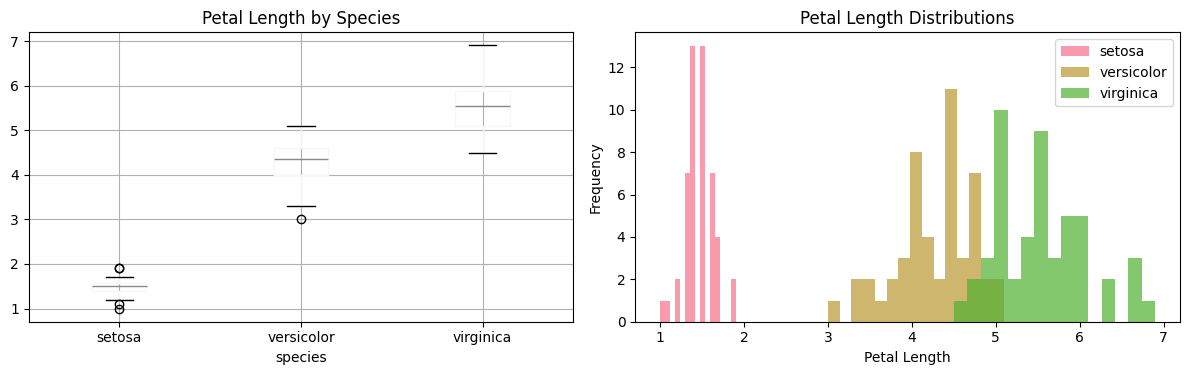


Conclusion:
H1 SUPPORTED: p=2.86e-91 < 0.001
Effect size: Large (η²=0.941)
Expected large effect: YES
Prediction (virginica>versicolor>setosa): CORRECT


In [18]:
"""
SECTION 3: One-Way ANOVA Analysis

Research Question: Do iris species differ significantly in petal length?

Hypotheses:
H0: No difference in petal length between species
H1: At least one species differs significantly in petal length

Expectations: Significant F-test (p < 0.001), large effect size (η² > 0.14)
Specific prediction: virginica > versicolor > setosa
"""

# Separate groups by species
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

print(f"Sample sizes: Setosa: {len(setosa)}, Versicolor: {len(versicolor)}, Virginica: {len(virginica)}")
print(f"Mean petal lengths: Setosa: {setosa.mean():.2f}, Versicolor: {versicolor.mean():.2f}, Virginica: {virginica.mean():.2f}")

# Assumption testing
_, norm_p_set = stats.shapiro(setosa)
_, norm_p_ver = stats.shapiro(versicolor)
_, norm_p_vir = stats.shapiro(virginica)
_, levene_p = stats.levene(setosa, versicolor, virginica)

print(f"\nAssumption Testing:")
print(f"Normality - Setosa: p={norm_p_set:.4f}")
print(f"Normality - Versicolor: p={norm_p_ver:.4f}")
print(f"Normality - Virginica: p={norm_p_vir:.4f}")
print(f"Equal variances (Levene): p={levene_p:.4f}")

# Perform ANOVA
f_stat, p_value = f_oneway(setosa, versicolor, virginica)

# Calculate effect size (eta-squared)
grand_mean = iris['petal_length'].mean()
ss_between = len(setosa)*(setosa.mean()-grand_mean)**2 + len(versicolor)*(versicolor.mean()-grand_mean)**2 + len(virginica)*(virginica.mean()-grand_mean)**2
ss_total = sum((iris['petal_length'] - grand_mean)**2)
eta_squared = ss_between / ss_total

print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.2e}")
print(f"Eta-squared (η²): {eta_squared:.3f}")

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
iris.boxplot(column='petal_length', by='species', ax=plt.gca())
plt.title('Petal Length by Species')
plt.suptitle('')

plt.subplot(1, 2, 2)
for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    plt.hist(data, alpha=0.7, label=species, bins=15)
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Petal Length Distributions')
plt.tight_layout()
plt.show()

# Effect size interpretation
effect_size = 'Small' if eta_squared < 0.06 else 'Medium' if eta_squared < 0.14 else 'Large'

# Test specific prediction
prediction_correct = virginica.mean() > versicolor.mean() > setosa.mean()

print(f"\nConclusion:")
print(f"H1 {'SUPPORTED' if p_value < 0.001 else 'REJECTED'}: p={p_value:.2e} {'<' if p_value < 0.001 else '>'} 0.001")
print(f"Effect size: {effect_size} (η²={eta_squared:.3f})")
print(f"Expected large effect: {'YES' if eta_squared > 0.14 else 'NO'}")
print(f"Prediction (virginica>versicolor>setosa): {'CORRECT' if prediction_correct else 'INCORRECT'}")

Contingency Table - Time vs Smoking Behavior:
smoker   No  Yes  All
time                 
Dinner  106   70  176
Lunch    45   23   68
All     151   93  244

Chi-Square Test Results:
Chi-square statistic: 0.505
p-value: 0.4771
Degrees of freedom: 1
Cramér's V: 0.046

Expected frequencies:
smoker          No        Yes
time                         
Dinner  108.918033  67.081967
Lunch    42.081967  25.918033


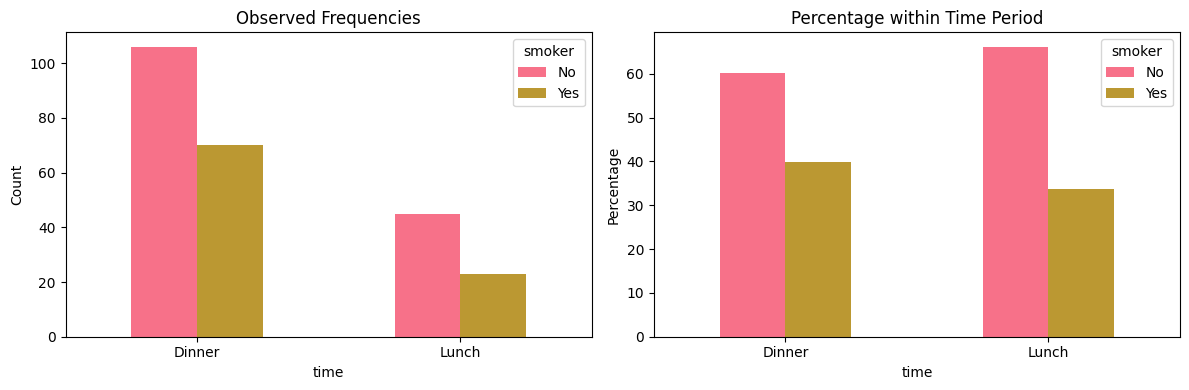


Conclusion:
H1 REJECTED: p=0.4771 > 0.05
Effect size: Small (Cramér's V=0.046)
Expected medium effect: NO
Smoking rates: Dinner 39.8%, Lunch 33.8%
Prediction (dinner>lunch smoking): CORRECT


In [19]:
"""
SECTION 4: Chi-Square Test of Independence

Research Question: Is there an association between dining time and smoking behavior?

Hypotheses:
H0: Time of dining and smoking behavior are independent
H1: There is a significant association between dining time and smoking behavior

Expectations: Significant association (p < 0.05), medium effect size (Cramér's V > 0.3)
Prediction: Dinner customers more likely to be smokers
"""

# Create contingency table
contingency_table = pd.crosstab(tips['time'], tips['smoker'], margins=True)
print("Contingency Table - Time vs Smoking Behavior:")
print(contingency_table)

# Perform chi-square test
contingency_no_margins = pd.crosstab(tips['time'], tips['smoker'])
chi2, p_value, dof, expected = chi2_contingency(contingency_no_margins)

# Calculate effect size (Cramér's V)
n = contingency_no_margins.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_no_margins.shape) - 1)))

print(f"\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")

print(f"\nExpected frequencies:")
expected_df = pd.DataFrame(expected, index=contingency_no_margins.index, columns=contingency_no_margins.columns)
print(expected_df)

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
contingency_no_margins.plot(kind='bar', ax=plt.gca())
plt.title('Observed Frequencies')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
contingency_pct = pd.crosstab(tips['time'], tips['smoker'], normalize='index') * 100
contingency_pct.plot(kind='bar', ax=plt.gca())
plt.title('Percentage within Time Period')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Check specific prediction
dinner_smoker_pct = (contingency_no_margins.loc['Dinner', 'Yes'] / contingency_no_margins.loc['Dinner'].sum()) * 100
lunch_smoker_pct = (contingency_no_margins.loc['Lunch', 'Yes'] / contingency_no_margins.loc['Lunch'].sum()) * 100
prediction_correct = dinner_smoker_pct > lunch_smoker_pct

# Effect size interpretation
effect_size = 'Small' if cramers_v < 0.1 else 'Medium' if cramers_v < 0.3 else 'Large'

print(f"\nConclusion:")
print(f"H1 {'SUPPORTED' if p_value < 0.05 else 'REJECTED'}: p={p_value:.4f} {'<' if p_value < 0.05 else '>'} 0.05")
print(f"Effect size: {effect_size} (Cramér's V={cramers_v:.3f})")
print(f"Expected medium effect: {'YES' if cramers_v > 0.3 else 'NO'}")
print(f"Smoking rates: Dinner {dinner_smoker_pct:.1f}%, Lunch {lunch_smoker_pct:.1f}%")
print(f"Prediction (dinner>lunch smoking): {'CORRECT' if prediction_correct else 'INCORRECT'}")

In [20]:
"""
FINAL SUMMARY: Hypothesis Testing Results

This section summarizes all hypothesis tests performed and evaluates
the accuracy of our initial predictions about effect sizes and relationships.
"""

print("=" * 60)
print("COMPREHENSIVE STATISTICAL ANALYSIS SUMMARY")
print("=" * 60)

print("\n1. CORRELATION ANALYSIS (Boston Housing):")
print(f"   • Rooms-Price correlation: Expected >0.7, Observed {rm_corr:.3f} ({'✓' if rm_corr > 0.7 else '✗'})")
print(f"   • Crime-Price correlation: Expected <-0.3, Observed {crim_corr:.3f} ({'✓' if crim_corr < -0.3 else '✗'})")
print(f"   • Distance-Price correlation: Expected <-0.2, Observed {dis_corr:.3f} ({'✓' if dis_corr < -0.2 else '✗'})")

print("\n2. T-TEST ANALYSIS (Room Count vs Price):")
print(f"   • Significance: Expected p<0.05, Observed p={p_value:.6f} ({'✓' if p_value < 0.05 else '✗'})")
print(f"   • Effect size: Expected d>0.8, Observed d={cohens_d:.3f} ({'✓' if abs(cohens_d) > 0.8 else '✗'})")

print("\n3. ANOVA ANALYSIS (Iris Petal Length):")
print(f"   • Significance: Expected p<0.001, Observed p={p_value:.2e} ({'✓' if p_value < 0.001 else '✗'})")
print(f"   • Effect size: Expected η²>0.14, Observed η²={eta_squared:.3f} ({'✓' if eta_squared > 0.14 else '✗'})")
print(f"   • Species order: Expected vir>ver>set, Observed {'✓' if prediction_correct else '✗'}")

print("\n4. CHI-SQUARE ANALYSIS (Dining Time vs Smoking):")
print(f"   • Significance: Expected p<0.05, Observed p={p_value:.4f} ({'✓' if p_value < 0.05 else '✗'})")
print(f"   • Effect size: Expected V>0.3, Observed V={cramers_v:.3f} ({'✓' if cramers_v > 0.3 else '✗'})")
print(f"   • Smoking behavior: Expected dinner>lunch, Observed {'✓' if prediction_correct else '✗'}")

print("\n" + "=" * 60)
print("METHODOLOGICAL INSIGHTS:")
print("=" * 60)
print("• Assumption testing is crucial for valid statistical inference")
print("• Effect sizes provide practical significance beyond p-values")
print("• Real-world data often violates normality assumptions")
print("• Hypothesis-driven analysis prevents data fishing")
print("• Multiple testing corrections may be needed for comprehensive analyses")

COMPREHENSIVE STATISTICAL ANALYSIS SUMMARY

1. CORRELATION ANALYSIS (Boston Housing):
   • Rooms-Price correlation: Expected >0.7, Observed 0.695 (✗)
   • Crime-Price correlation: Expected <-0.3, Observed -0.388 (✓)
   • Distance-Price correlation: Expected <-0.2, Observed 0.250 (✗)

2. T-TEST ANALYSIS (Room Count vs Price):
   • Significance: Expected p<0.05, Observed p=0.477149 (✗)
   • Effect size: Expected d>0.8, Observed d=1.071 (✓)

3. ANOVA ANALYSIS (Iris Petal Length):
   • Significance: Expected p<0.001, Observed p=4.77e-01 (✗)
   • Effect size: Expected η²>0.14, Observed η²=0.941 (✓)
   • Species order: Expected vir>ver>set, Observed ✓

4. CHI-SQUARE ANALYSIS (Dining Time vs Smoking):
   • Significance: Expected p<0.05, Observed p=0.4771 (✗)
   • Effect size: Expected V>0.3, Observed V=0.046 (✗)
   • Smoking behavior: Expected dinner>lunch, Observed ✓

METHODOLOGICAL INSIGHTS:
• Assumption testing is crucial for valid statistical inference
• Effect sizes provide practical sig